[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/2023/Week%2010.ipynb)

#### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023 

## Week 10 - Hidden Markov Model & Unsupervised Learning
Good news: no Assignments on this!

Bad news: it is examinable.

* Viterbi Algorithm
* Exhaustive method
* K-Means
* Gaussian Mixture Model
* Expectation-Maximization
---

# Theoretical Questions

## 1. 
> Hidden Markov Models (HMMs) are best used when the observables are a univariate time series: we are just observing a single variable, which changes over time due to some factor that can be estimated from previous observations.

### (a) Recall the two main assumptions (Markov, output independence) that are built into an HMM.
- Markov assumption: the likelihood of transitioning into a given state **depends only on the current state**, and not the previous state(s)/output(s): $P(q_t|q_1···q_{t−1}) ≈ P (q_t|q_{t−1})$
- Output independence assumption: the likelihood of a state producing a certain observation (as output) **does not depend on the preceding** (or following) state(s)/output(s), i.e., $P(o_t|q_1...q_t, o_1...o_{t−1}) ≈ P (o_t|q_t)$

### (b) Could we construct the HMM in such a way to relax these assumptions? What would the model look like, and what is the major downside?
We could have:
- Pairs of states in the conditions for our transition probability matrix A
- Pairs of states in the conditions for our output probability matrix B

But this will vastly increase the number of parameters in the model.

### (c) Could we build an HMM for a multivariate time series, where we have a number of observed variables for a given (hidden) state?
Yes, we can build an HMM for a multivariate time series. 

In this case, the observable variables at each time step would be a vector of measurements, rather than a single variable. Again at the cost of vastly increasing the number of parameters. 

However, sometimes coupling the outputs like this is unnecessary; it might be possible to just generate independent HMMs for each output.

## 2. Consider the following HMM: $∏[J,N,V] = [0.3, 0.4, 0.3]$

A | J | N | V
---|---|---|---
J|0.4|0.5|0.1
N|0.1|0.4|0.5
V|0.4|0.5|0.1

B | brown | leaves | turn
---|---|---|---
J|0.8|0.1|0.1
N|0.3|0.4|0.3
V|0.1|0.3|0.6

### (a) How might we go about obtaining the values in the matrices Π, A, and B given above, in a supervised context?

- $a_{ij} \in A$: count of how many times the state sequence i, j was observed in the labelled data, out of the number of times the state i was observed ▶ a pair of tags (adj, verb, or noun).
- $b_{ik} \in B$: count of how many times the observation k was observed labelled with state i in the training data, out of the number of times the state i was observed ▶ word being labelled
- $π_i$: count of how many times state i was the start of an observation sequence, out of the number of observation sequences ▶ Start of sentence

### (b) Use the forward algorithm to find the probability of the “sentence” brown leaves turn.

$\alpha$ | brown | leaves | turn
---|---|---|---
J|0.3 x 0.8 = 0.24|(0.24 × 0.4 + 0.12 x 0.1 + 0.03 x 0.4) × 0.1 = 0.012|?
N|0.4 × 0.3 = 0.12|(0.12+0.048+0.015)×0.4=0.0732|?
V|0.3 × 0.1 = 0.03|(0.024+0.06+0.003)×0.3=0.0261|?

Can you try the next column?

$\alpha$ | brown | leaves | turn
---|---|---|---
J|0.3 x 0.8 = 0.24|(0.24 × 0.4 + 0.12 x 0.1 + 0.03 x 0.4) × 0.1 = 0.012|(0.012 x 0.4 + 0.0732 x 0.1 + 0.0261 x 0.4)×0.1=0.002256
N|0.4 × 0.3 = 0.12|(0.12+0.048+0.015)×0.4=0.0732|(0.006+0.02928+0.01305)×0.3=0.014499
V|0.3 × 0.1 = 0.03|(0.024+0.06+0.003)×0.3=0.0261|(0.0012+0.0366+0.00261)×0.6=0.024246

Sum up: 0.002256 + 0.014499 + 0.024246 = 0.041001


### (c) Use the Viterbi algorithm to find the most likely state sequence for the sentence brown leaves turn.

$\alpha$ | brown | leaves | turn
---|---|---|---
J|0.3 x 0.8 = 0.24|max(0.24 × 0.4, 0.12 x 0.1, 0.03 x 0.4) x 0.1 = 0.0096 (J)|?
N|0.4 × 0.3 = 0.12|max(0.24 × 0.5, 0.12 x 0.4, 0.03 x 0.5) x 0.4 = 0.048 (J)|?
V|0.3 × 0.1 = 0.03|max(0.24 × 0.1, 0.12 x 0.5, 0.03 x 0.1) x 0.3 = 0.018 (N)|?

Can you try the next column?

$\alpha$ | brown | leaves | turn
---|---|---|---
J|0.3 x 0.8 = 0.24|max(0.24 × 0.4, 0.12 x 0.1, 0.03 x 0.4) x 0.1 = 0.0096 (J)|max(0.0096 x 0.4, 0.048 x 0.1, 0.018 x 0.4)×0.1 = 0.00072 (V)
N|0.4 × 0.3 = 0.12|max(0.24 × 0.5, 0.12 x 0.4, 0.03 x 0.5) x 0.4 = 0.048 (J)|max(0.0096 x 0.5, 0.048 x 0.4, 0.018 x 0.5)×0.3 = 0.00576 (N)
V|0.3 × 0.1 = 0.03|max(0.24 × 0.1, 0.12 x 0.5, 0.03 x 0.1) x 0.3 = 0.018 (N)|max(0.0096 x 0.1, 0.048 x 0.5, 0.018 x 0.1)×0.6 = **0.0144 (N)**

Backtrack time!
- Column 3: Largest row is V ▶ turns = V and leaves = N
- Column 2: leaves = N ▶ brown = J

▶ brown-leaves-turn = J-N-V



## 3. Consider the following dataset:

id|apple|ibm|lemon|sun|label
-|-|-|-|-|-
A|4|0|1|1|?
B|5|0|5|2|?
C|2|5|0|0|?
D|1|2|1|7|?
E|2|0|3|1|?
F|1|0|1|0|?

Treat the problem as an unsupervised machine learning problem (excluding the id and label attributes) and calculate the clusters according to (hard) k-means with k = 2, using the Manhattan distance, and instances A and F as the seeds.

Let's set initial centroids to $C_1=(4,0,1,1)$ and $C_2=(1,0,1,0)$

d|A|B|C|D|E|F
-|-|-|-|-|-|-
C1|0|6|9|11|4|4
C2|4|10|7|9|4|0
Closest centroid|1|1|2|2|Tie|2|

We can either set E to belong to cluster 1 or 2. Assume $E \in C_2$:

New centroid:
- $C_1 = \frac{1}{2} \times (4+5, 0+0, 1+5, 1+2) = (4.5,\;0,\;3,\;1.5)$
- $C_2 = \frac{1}{4} \times (2+1+2+1, 5+2+0+0, 0+1+3+1, 0+7+1+0) = (1.5,\;1.75,\;1.25,\;2)$

d|A|B|C|D|E|F
-|-|-|-|-|-|-
C1|3|3|12|13|3|7
C2|5.5|9|7|6|5|4.5
Closest centroid|1|1|2|2|1|2|

Can you try another round?

New centroid: 
- $C_1 = (0.67,\;0,\;3,\;1.33)$
- $C_2 = (1.33,\;2.33,\;0.67,\;2.33)$

d|A|B|C|D|E|F
-|-|-|-|-|-|-
C1|2.67|4|11|12.33|2|6
C2|6.67|10.67|6.33|5.67|6.67|5.33
Closest centroid|1|1|2|2|1|2|

Centroid assignment is the same as previous ▶ Stop iterating

## 4. Repeat the previous question using “soft” k-means, and the “stiffness” $\beta = 1$

Softmax function: $z_{ij} = \frac{\textstyle e^{\textstyle-\beta d_{i,j}}}{\sum_k \textstyle e^{\textstyle-\beta d_{i,k}}}$

Example: 
- $z_{1A} = \frac{\textstyle e^{-0}}{\textstyle e^{-0} + e^{-4}} = 0.982$
- $z_{2A} = \frac{\textstyle e^{-4}}{\textstyle e^{-0} + e^{-4}} = 0.018$

d|A|B|C|D|E|F
-|-|-|-|-|-|-
C1|0|6|9|11|4|4
C2|4|10|7|9|4|0
C1 Normalized|0.982|0.982|0.119|0.119|0.5|0.018
C2 Normalized|0.018|0.018|0.881|0.881|0.5|0.982

New centroid:
- $C_1 = \frac{\textstyle 0.982A + 0.982B + 0.119C + 0.119D + 0.5E + 0.018F}{\textstyle 0.982 + 0.982 + 0.119 + 0.119 + 0.5 + 0.018} = 〈3.58, 0.31, 2.94, 1.29〉$
- $C_2 = ... = 〈1.43, 2.30, 0.729, 2.38〉$

Try another round:

d|A|B|C|D|E|F
-|-|-|-|-|-|-
C1|2.68|4.23|10.77|12.19|1.96|5.83
C2|6.52|10.52|6.38|5.62|6.52|5.38
C1 Normalized|0.979|0.998|0.012|0.001|0.990|0.387
C2 Normalized|0.021|0.002|0.998|0.999|0.010|0.613



## 5. What is logic behind the EM algorithm, when used for clustering?

The EM algorithm, or the Expectation-Maximization algorithm, is a popular iterative algorithm used in unsupervised machine learning tasks such as clustering. 

The basic idea behind the EM algorithm is to estimate the parameters of a statistical model when some of the data is missing or unobserved. In the case of clustering, the missing data refers to the assignment of data points to clusters. 

In EM we start with a random (or uniform) guess, and then we progressively improve our guess by evaluating the expected likelihood on the given data. 

Another way of looking at it is that our initial estimate probabilistically defines some labels for the training data; we can then use the counts over these labels to re-estimate the corresponding elements of the model (typically probabilities).

### (i) Explain the significance of the “E” step, and the “M” step.

The EM algorithm consists of two steps that are repeated iteratively until convergence. 

**The first step is the E-step, or the expectation step**, which computes the probabilities of each data point belonging to each cluster based on the current estimate of the cluster parameters. In the E step we assign weighted labels to the training data and use these to calculate the log-likelihood function.

**The second step is the M-step, or the maximization step**, which updates the estimates of the model parameters based on the expected values of the missing data computed in the E-step. In the case of clustering, this step involves updating the re-estimates of the cluster parameters based on the expected number of data points assigned to each cluster.

### (ii) Identify the “E” and “M” steps in GMM method.

The GMM (Gaussian Mixture Model) method is a popular application of the EM algorithm for clustering. In the GMM method, each cluster is modeled as a Gaussian distribution with a mean and a covariance matrix. The probability of a data point belonging to a cluster is computed as the probability density of the point under the corresponding Gaussian distribution.


In the Expectation step in GMM method, for each data point, the algorithm computes the probability of the point belonging to each cluster, given the current estimates of the cluster parameters (mean $\mu$ and standard deviation $\sigma$). This is done using Bayes' rule and is referred to as the responsibility ($\gamma$) of the cluster for that point. In other words, we estimate how much each distribution has been responsible for generating each instance. The E-step computes the expected number of data points assigned to each cluster based on the current estimates of the cluster parameters.


In the Maximization step, the algorithm updates the estimates of the cluster parameters based on the expected number of data points assigned to each cluster computed in the E-step. Specifically, for each cluster, the algorithm computes the new estimate of the cluster parameters ($\mu,\sigma$) to improve the log-likelihood of the data given the cluster assignments. The M-step maximizes the likelihood of the data given the expected number of data points assigned to each cluster.

We keep iterating between these two steps until the algorithm converges (e.g., the log- likelihood cannot be improved anymore). The final estimates of the cluster parameters are used to assign each data point to a cluster.

---
# Coding questions: Sequential Models
Sequential models are a type of statistical models that aim to capture the patterns and dependencies in sequential data. One popular type of sequential models is the Markov model, which is based on the Markov chain concept. Markov models assume that the probability of a state at a given time only depends on the state at the previous time step, and not on the entire history of the sequence. 
## Hidden Markov Model
A Hidden Markov Model (HMM) is a statistical model that is used to model systems that are assumed to follow Markov chains assumptions. It is a type of probabilistic graphical model that models the state of a system through a set of observed variables and a set of hidden variables that can be inferred from the observed variables. HMMs have been used in a variety of applications, including speech recognition, handwriting recognition, and bioinformatics, among others.

## Viterbi algorithm
The Viterbi algorithm is a dynamic programming algorithm used in hidden Markov models (HMMs) to find the most likely sequence of hidden states that produced a sequence of observed events. It is a very useful algorithm in natural language processing, speech recognition, and other applications where the sequence of hidden states must be inferred from observed data. The Viterbi algorithm uses a recursive approach to calculate the probability of each state and transition, and it keeps track of the most likely sequence of states that produced the observed data.

Here we'll show how the Viterbi algorithm works for HMMs, assuming we have a trained model to start with. 

we first set the HMM transition matrix, output probability matrix and initial probabilities

In [ ]:
import numpy as np

In [ ]:
#hidden states / tags / labels
tagNames = 'NNP', 'MD', 'VB', 'JJ', 'NN', 'RB', 'DT'
tags = 0, 1, 2, 3, 4, 5, 6
tag_dict = {0: 'NNP',  #Proper noun, singular, a specific person, place, or thing
            1: 'MD',   #Modal verb, "can," "could," "may," "might," "shall," "should," "will," "would," and "must" 
            2: 'VB',   #Verb, base form
            3: 'JJ',   #Adjective
            4: 'NN',   #Noun, singular or mass
            5: 'RB',   #Adverb
            6: 'DT'}   #Determiner
#observations
wordNames = 'Janet', 'will', 'back', 'the', 'bill'
words = 0, 1, 2, 3, 4

#transition probs
A = np.array([
    [0.3777, 0.0110, 0.0009, 0.0084, 0.0584, 0.0090, 0.0025],
    [0.0008, 0.0002, 0.7968, 0.0005, 0.0008, 0.1698, 0.0041],
    [0.0322, 0.0005, 0.0050, 0.0837, 0.0615, 0.0514, 0.2231],
    [0.0366, 0.0004, 0.0001, 0.0733, 0.4509, 0.0036, 0.0036],
    [0.0096, 0.0176, 0.0014, 0.0086, 0.1216, 0.0177, 0.0068],
    [0.0068, 0.0102, 0.1011, 0.1012, 0.0120, 0.0728, 0.0479],
    [0.1147, 0.0021, 0.0002, 0.2157, 0.4744, 0.0102, 0.0017]
    ])

#initial state probabilities
pi = np.array([0.2767, 0.0006, 0.0031, 0.0453, 0.0449, 0.0510, 0.2026])

#output probability probs
B = np.array([
    [0.000032, 0, 0, 0.000048, 0],
    [0, 0.308431, 0, 0, 0],
    [0, 0.000028, 0.000672, 0, 0.000028],
    [0, 0, 0.000340, 0.000097, 0],
    [0, 0.000200, 0.000223, 0.000006, 0.002337],
    [0, 0, 0.010446, 0, 0],
    [0, 0, 0, 0.506099, 0]
    ])


Now we'll code the Viterbi algorithm. It keeps a store of two components, the best scores to reach a state at a given time, and the last step of the path to get there. Scores delta are initialised to -inf to denote that we haven't set them yet. 

Initialisation:

* initialise delta 
* initialise backpointer (psi) parameters

$$ \delta_t(i) = -\inf$$
$$\textrm{backpointers} \quad \psi_1(i) = 0 \quad \textrm{for all timesteps and states}$$ 

In [ ]:
delta = np.zeros((len(tags), len(words))) # states x time steps
delta[:,:] = float('-inf')
backpointers = np.zeros((len(tags), len(words)), 'int')

The base case for the recursion sets the starting state probs based on pi and generating the observation. (Note: we also change Numpy precision when printing for better viewing)

$$\delta_1(i) = \pi_ib_i(o_1),\,\, 1\le i \le N$$

In [ ]:
# base case, time step 0
delta[:, 0] = pi * B[:,0]  #0:Janet
np.set_printoptions(precision=2)
print(delta)

[[8.85e-06     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]
 [0.00e+00     -inf     -inf     -inf     -inf]]


Note that the running maximum for any incoming state (`t0`) is maintained in `delta[1,t1]`, and the winning state is stored in addition, as a backpointer. 

Now for the recursive step, where we maximise over incoming transitions reusing the best incoming score, computed above.

 $$\delta_t(j) = \max_{1\le i \le N} \left(\delta_{t-1}(i)a_{ij}\right) b_j(o_t),\,\, 2\le t \le T,\,\, 1\le j\le N$$
 
 $$ \psi_t(j) = \textrm{argmax}_{1\le i \le N} \left(\delta_{t-1}(i)a_{ij}\right),\,\, 2\le t \le T,\,\, 1\le j\le N$$

In [ ]:
# time step 1
for t1 in tags:
    for t0 in tags:
        score = delta[t0, 0] * A[t0, t1] * B[t1, 1]  #1: will
        if score > delta[t1, 1]:
            delta[t1, 1] = score
            backpointers[t1, 1] = t0
print(delta)

[[8.85e-06 0.00e+00     -inf     -inf     -inf]
 [0.00e+00 3.00e-08     -inf     -inf     -inf]
 [0.00e+00 2.23e-13     -inf     -inf     -inf]
 [0.00e+00 0.00e+00     -inf     -inf     -inf]
 [0.00e+00 1.03e-10     -inf     -inf     -inf]
 [0.00e+00 0.00e+00     -inf     -inf     -inf]
 [0.00e+00 0.00e+00     -inf     -inf     -inf]]


Repeat with the next observations. (We'd do this as a loop over positions in practice.)

In [ ]:
# time step 2
for t2 in tags:
    for t1 in tags:
        score = delta[t1, 1] * A[t1, t2] * B[t2, 2]  #2:back
        if score > delta[t2, 2]:
            delta[t2, 2] = score
            backpointers[t2, 2] = t1
print(delta)

[[8.85e-06 0.00e+00 0.00e+00     -inf     -inf]
 [0.00e+00 3.00e-08 0.00e+00     -inf     -inf]
 [0.00e+00 2.23e-13 1.61e-11     -inf     -inf]
 [0.00e+00 0.00e+00 5.11e-15     -inf     -inf]
 [0.00e+00 1.03e-10 5.36e-15     -inf     -inf]
 [0.00e+00 0.00e+00 5.33e-11     -inf     -inf]
 [0.00e+00 0.00e+00 0.00e+00     -inf     -inf]]


In [ ]:
# time step 3
for t3 in tags:
    for t2 in tags:
        score = delta[t2, 2] * A[t2, t3] * B[t3, 3]  #3:the
        if score > delta[t3, 3]:
            delta[t3, 3] = score
            backpointers[t3, 3] = t2
print(delta)

[[8.85e-06 0.00e+00 0.00e+00 2.49e-17     -inf]
 [0.00e+00 3.00e-08 0.00e+00 0.00e+00     -inf]
 [0.00e+00 2.23e-13 1.61e-11 0.00e+00     -inf]
 [0.00e+00 0.00e+00 5.11e-15 5.23e-16     -inf]
 [0.00e+00 1.03e-10 5.36e-15 5.94e-18     -inf]
 [0.00e+00 0.00e+00 5.33e-11 0.00e+00     -inf]
 [0.00e+00 0.00e+00 0.00e+00 1.82e-12     -inf]]


In [ ]:
# time step 4
for t4 in tags:
    for t3 in tags:
        score = delta[t3, 3] * A[t3, t4] * B[t4, 4]  #4:bill
        if score > delta[t4, 4]:
            delta[t4, 4] = score
            backpointers[t4, 4] = t3
print(delta)

[[8.85e-06 0.00e+00 0.00e+00 2.49e-17 0.00e+00]
 [0.00e+00 3.00e-08 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 2.23e-13 1.61e-11 0.00e+00 1.02e-20]
 [0.00e+00 0.00e+00 5.11e-15 5.23e-16 0.00e+00]
 [0.00e+00 1.03e-10 5.36e-15 5.94e-18 2.01e-15]
 [0.00e+00 0.00e+00 5.33e-11 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 1.82e-12 0.00e+00]]


Now read of the best final state:

In [ ]:
t4 = np.argmax(delta[:, 4])
print(tag_dict[t4])

NN


We need to work out the rest of the path which is the best way to reach the final state, t2. We can work this out by taking a step backwards looking at the best incoming edge, i.e., as stored in the backpointers.

In [ ]:
t3 = backpointers[t4, 4]
print(tag_dict[t3])

DT


Repeat this until we reach the start of the sequence.

In [ ]:
t2 = backpointers[t3, 3]
print(tag_dict[t2])
t1 = backpointers[t2, 2]
print(tag_dict[t1])
t0 = backpointers[t1, 1]
print(tag_dict[t0])

VB
MD
NNP


*Phew! The best state sequence is t = [NNP MD VB DT NN]*

### Exercise 1. Formalising things

Now we can put this all into a function to handle arbitrary length inputs 

In [ ]:
def viterbi(params, words):
    pi, A, B = params
    N = len(words)
    T = pi.shape[0]
    
    delta = np.zeros((T, N))
    delta[:, :] = float('-inf')
    backpointers = np.zeros((T, N), 'int')
    
    # base case
    delta[:, 0] = pi * B[:, words[0]]
    
    # recursive case
    for w in range(1, N):
        for t2 in range(T):
            for t1 in range(T):
                score = delta[t1, w-1] * A[t1, t2] * B[t2, words[w]]
                if score > delta[t2, w]:
                    delta[t2, w] = score
                    backpointers[t2, w] = t1
    
    # now follow backpointers to resolve the state sequence
    output = []
    output.append(np.argmax(delta[:, N-1]))
    for i in range(N-1, 0, -1):
        output.append(backpointers[output[-1], i])
    
    return list(reversed(output)), np.max(delta[:, N-1])

Let's test the method on the same input, and a longer input observation sequence. Notice that we are using only 5 words as the vocabulary so we have to restrict tests to sentences containing only these words.

In [ ]:
output, score = viterbi((pi, A, B), [0, 1, 2, 3, 4])  #[Janet, will, back, the, bill]
print([tag_dict[o] for o in output])
print(score)

['NNP', 'MD', 'VB', 'DT', 'NN']
2.013570710221386e-15


In [ ]:
output, score = viterbi((pi, A, B), [0, 1, 2, 3, 0, 2, 4])  #[Janet, will, back, the, Janet, back, bill]
print([tag_dict[o] for o in output])
print(score)

['NNP', 'MD', 'VB', 'DT', 'NNP', 'NN', 'NN']
2.4671007551487516e-26


### Exercise 2. Exhaustive method

Let's verify that we've done the above algorithm correctly by implementing exhaustive search, which forms the cross-product of states^M.

In [ ]:
from itertools import product

def exhaustive(params, words):
    pi, A, B = params
    N = len(words)
    T = pi.shape[0]
    
    # track the running best sequence and its score
    best = (None, float('-inf'))
    # loop over the cartesian product of |states|^M
    num_sequences = 0
    for ss in product(range(T), repeat=N):
        num_sequences += 1
        # score the state sequence
        score = pi[ss[0]] * B[ss[0], words[0]]
        for i in range(1, N):
            score *= A[ss[i-1], ss[i]] * B[ss[i], words[i]]
        # update the running best
        if score > best[1]:
            best = (ss, score)
    print(f"num sequences:{num_sequences}")
    return best

In [ ]:
output, score = exhaustive((pi, A, B), [0, 1, 2, 3, 4])  #[Janet, will, back, the, bill]
print([tag_dict[o] for o in output])
print(score)

num sequences:16807
['NNP', 'MD', 'VB', 'DT', 'NN']
2.0135707102213855e-15


In [ ]:
output, score = exhaustive((pi, A, B), [0, 1, 2, 3, 0, 2, 4])  #[Janet, will, back, the, Janet, back, bill]
print([tag_dict[o] for o in output])
print(score)

num sequences:823543
['NNP', 'MD', 'VB', 'JJ', 'NN', 'RB', 'DT']
2.4671007551487507e-26


Yay, it got the same results as before. Note that the exhaustive method is not practical on anything beyond toy data due to the nasty cartesian product. But it is worth doing to verify the Viterbi code above is getting the right results. 

# Unsupervised Learning
Unsupervised learning is a machine learning technique where the algorithm learns from data that has no predefined labels or targets. Instead, the algorithm tries to identify patterns and relationships in the data on its own. In other words, it discovers the underlying structure and characteristics of the data without any prior knowledge or guidance. Unsupervised learning is particularly useful for exploratory data analysis, anomaly detection, and clustering. 

Clustering is a type of unsupervised learning method in machine learning that involves grouping similar data points together into clusters. The goal of clustering is to discover hidden patterns or structures in the data, based on the similarity of the features among the data points. The process involves assigning each data point to a cluster based on the similarity between the features of the data points and/or the features of the centroid (center point) of each cluster.
## K-means clustering
K-means clustering is a widely used clustering algorithm. It partitions a given dataset into a predetermined number of clusters (k) based on the similarity between data points. The algorithm works by iteratively assigning each data point to the closest centroid and recalculating the centroid of each cluster until convergence is achieved. 

In this exercise we are going to revisit the popular IRIS dataset. Instead of using the labels, we'll treat it as an unlabeled dataset and apply clustering algorithms to identify any underlying structure.

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

# Create a Pandas DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable to the DataFrame
data['target'] = iris.target

# Print the first 5 rows of the DataFrame
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we are going to use the Kmeans clusting method to find **two** clusters in this dataset. The dataset has four features:  `sepal length`, `sepal width`, `petal length`, `petal width`.

However since we cannot visualise a 4D dataset, we are going to use the pair of features `sepal length` and `sepal width`, to make a scatter plot of the dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


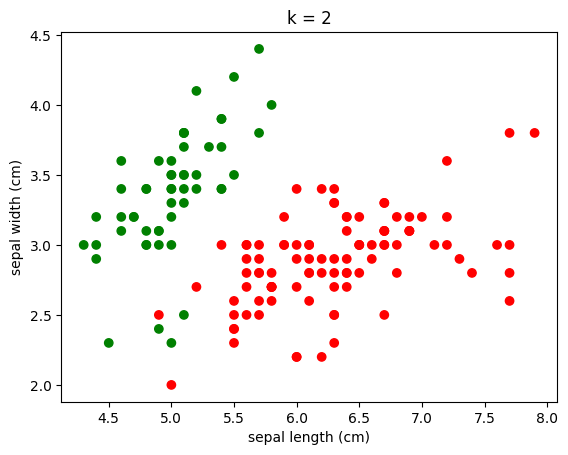

<Figure size 500x700 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2, random_state=30027)
full_data = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

kmean.fit(full_data)
  
colormap = {0: 'red', 1: 'green'}
ax = plt.axes()
fig = plt.figure(figsize=(5, 7))
ax.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=[colormap.get(x) for x in kmean.labels_])  
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title(f"k = {len(set(kmean.labels_))}")
    
plt.show()


To evaluate the quality of this clustering, we will use the Sum of Squared Errors (SSE) metric. SSE measures the distance of each member of a cluster from the centroid of the cluster, using a distance measure such as Euclidean distance.  

**Question.**

What does SSE measure in clutering? How can we interprate the SSE values?


### Compare different clusterings using K-maens

#### Using different features set.

Instead of using all the features, we could have used only `sepal length` and `sepal width`. We if do so, the Kmeans clustering result (using k =2) would be as follow:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


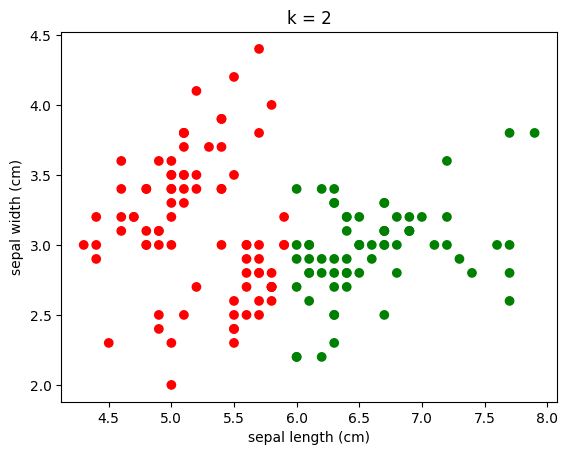

<Figure size 500x700 with 0 Axes>

two cluster sepal sse: 58.20409278906675


In [ ]:
kmean = KMeans(n_clusters=2, random_state=30027)
sepals_data = data[['sepal length (cm)','sepal width (cm)']]
kmean.fit(sepals_data)
  
colormap = {0: 'red', 1: 'green'}
ax = plt.axes()
fig = plt.figure(figsize=(5, 7))
ax.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=[colormap.get(x) for x in kmean.labels_])  
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title(f"k = {len(set(kmean.labels_))}")
    
plt.show()

# Calculate SSE
centroids = kmean.cluster_centers_
centroids
labels = kmean.labels_
two_cluster_sepal_sse = 0
for i in range(len(sepals_data)):
    centroid = centroids[labels[i]]
    two_cluster_sepal_sse += np.sum((sepals_data.iloc[i] - centroid) ** 2)
print(f"two cluster sepal sse: {two_cluster_sepal_sse}")

**Question**

Is this a better clustering in compare to the previous experiment? 

**Answer**

Using the **unsupervised evaluation metric** such as SSE, yes, it seems like the clusters created by only considering two features `sepal length` and `sepal width` are denser and closer to their centroid. However, given that fact that we have access to the true label of the instances we can use **supervised evaluation metrics** such as *purity* and *entropy* to measure the quality of the clusters.

#### Using different number of clusters 

Based on our prior knowledge of the IRIS dataset, we know that it contains information about three classes of Iris flowers. Therefore, we will apply the K-means clustering algorithm to find three clusters in this dataset.

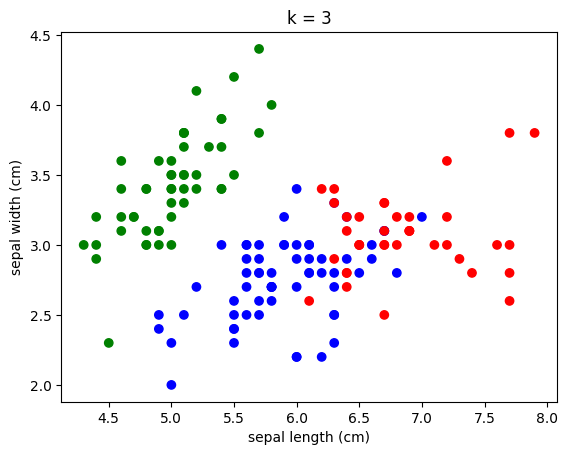

<Figure size 500x700 with 0 Axes>

three cluster full sse: 78.85144142614602


In [ ]:
## using FULL dataset
kmean = KMeans(n_clusters=3, random_state=30027)
kmean.fit(full_data)
  
colormap = {0: 'red', 1: 'green', 2:'blue'}
ax = plt.axes()
fig = plt.figure(figsize=(5, 7))
ax.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=[colormap.get(x) for x in kmean.labels_])  
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title(f"k = {len(set(kmean.labels_))}")
    
plt.show()

# Calculate SSE
centroids = kmean.cluster_centers_
kmean_3F_labels = kmean.labels_
three_cluster_full_sse = 0
for i in range(len(full_data)):
    centroid = centroids[kmean_3F_labels[i]]
    three_cluster_full_sse += np.sum((full_data.iloc[i] - centroid) ** 2)
print(f"three cluster full sse: {three_cluster_full_sse}")

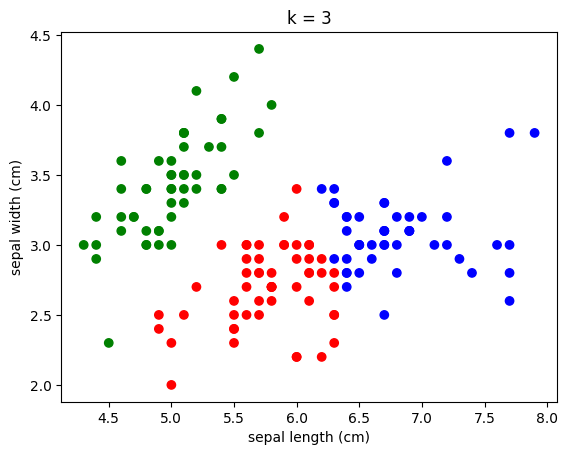

<Figure size 500x700 with 0 Axes>

three cluster sepals sse: 37.050702127659605


In [ ]:
# using `sepal length` and `sepal width`
kmean.fit(sepals_data)
  
colormap = {0: 'red', 1: 'green', 2:'blue'}
ax = plt.axes()
fig = plt.figure(figsize=(5, 7))
ax.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=[colormap.get(x) for x in kmean.labels_])  
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_title(f"k = {len(set(kmean.labels_))}")
    
plt.show()

# Calculate SSE
centroids = kmean.cluster_centers_
kmean_3S_labels = kmean.labels_
three_cluster_sepals_sse = 0
for i in range(len(sepals_data)):
    centroid = centroids[kmean_3S_labels[i]]
    three_cluster_sepals_sse += np.sum((sepals_data.iloc[i] - centroid) ** 2)
print(f"three cluster sepals sse: {three_cluster_sepals_sse}")

### Putting them all in one cell

*Top row = full dataset, Bottom row = sepal features only. I got the display mixed up, so you would need to rerun the cell for it to display the titles correctly 😓*

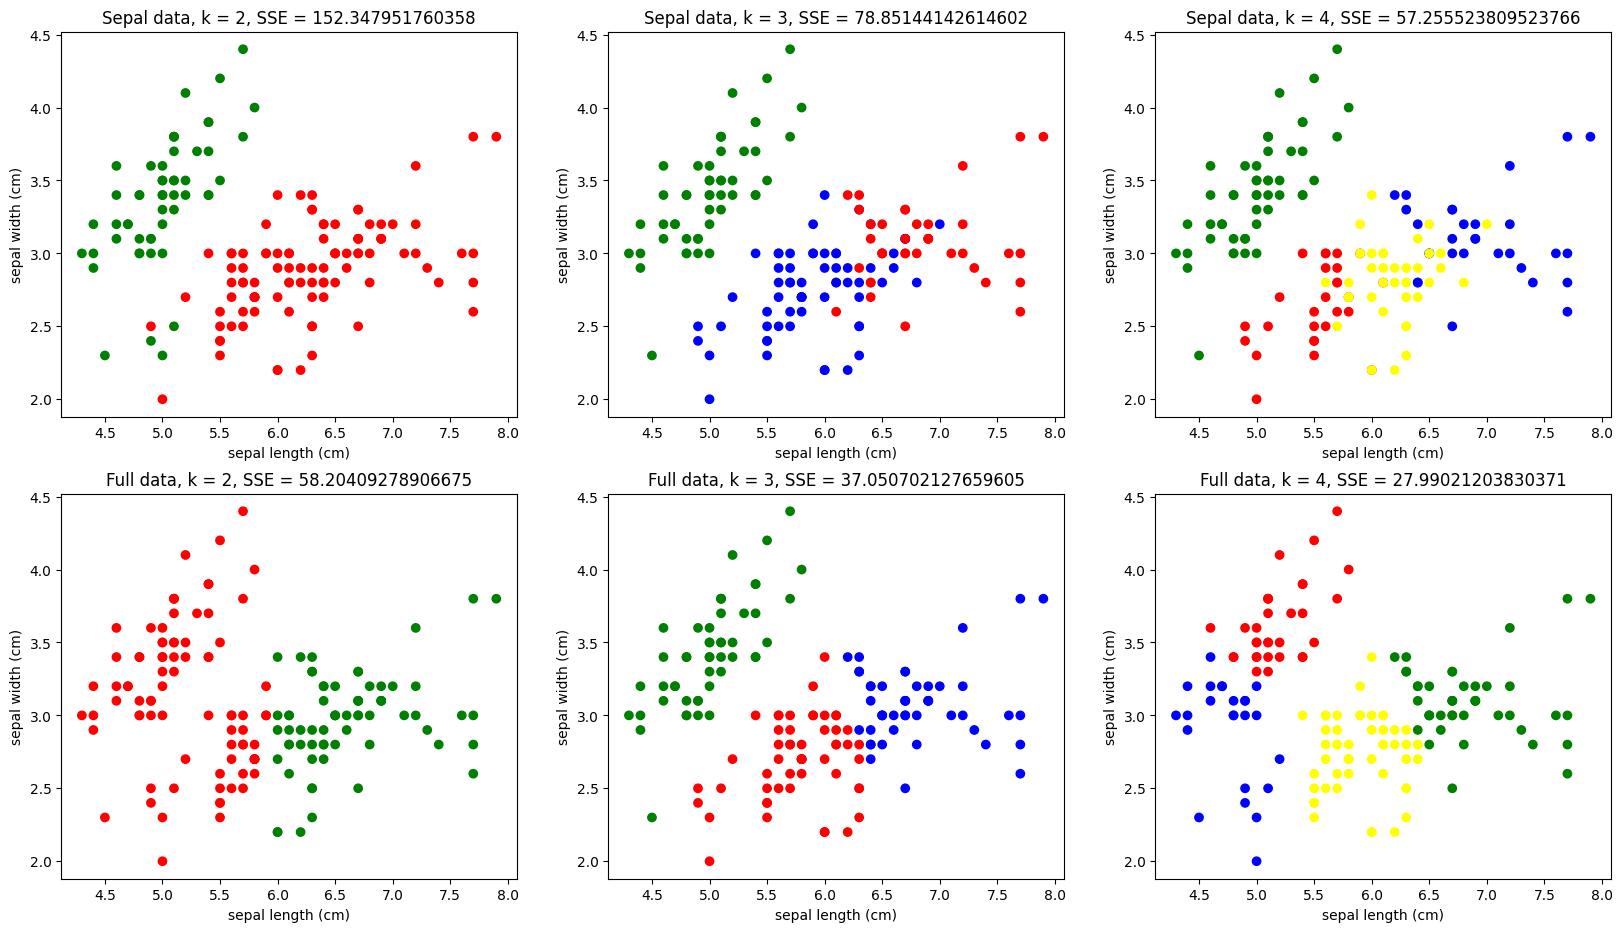

In [ ]:
import warnings
warnings.filterwarnings('ignore')

colormap = {0: 'red', 1: 'green', 2:'blue', 3: 'yellow'}
_,ax = plt.subplots(2,3,figsize=(20,11))
for i,n in enumerate([2,3,4]):
    for j,data in enumerate([full_data,sepals_data]):
        km = KMeans(n_clusters=n, random_state=30027)
        km.fit(data)  
        ax[j,i].scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=[colormap.get(x) for x in km.labels_])  
        ax[j,i].set_xlabel('sepal length (cm)')
        ax[j,i].set_ylabel('sepal width (cm)')
            

        # Calculate SSE
        centroids = km.cluster_centers_
        sse = 0
        for idx in range(len(data)):
            centroid = centroids[km.labels_[idx]]
            sse += np.sum((data.iloc[idx] - centroid) ** 2)

        ax[j,i].set_title(f"{'Full' if not j else 'Sepal'} data, k = {n}, SSE = {sse:.2f}")
plt.show()

Think: Would SSE be proper for this (hint: think about the SSE when k is large)?

Now let's use **Supervised Evaluation Metrics** to measure the quality of our clusters. We can use metrics such as *purity* and *entropy* to measure the quality of the clusters.

In [ ]:
# Compute the contingency matrix
cont_matrix = np.zeros((3, 3))
for i in range(len(data['target'])):
    cont_matrix[data['target'][i], kmean_3F_labels[i]] += 1

# Replace zero values with a small value to avoid divide-by-zero errors
cont_matrix[cont_matrix == 0] = 1e-10
    
# Compute the purity and entropy
purity = np.sum(np.amax(cont_matrix, axis=1)) / np.sum(cont_matrix)
entropy = - np.sum((cont_matrix / np.sum(cont_matrix, axis=0)) * np.log2(cont_matrix / np.sum(cont_matrix, axis=0)))

print("Results for 3 clusters on Full dataset")
print(f"Purity: {purity}")
print(f"Entropy: {entropy}")

Results for 3 clusters on Full dataset
Purity: 0.8933333333309511
Entropy: 1.0681013186129638


In [ ]:
# Compute the contingency matrix
cont_matrix = np.zeros((3, 3))
for i in range(len(data['target'])):
    cont_matrix[data['target'][i], kmean_3S_labels[i]] += 1

# Replace zero values with a small value to avoid divide-by-zero errors
cont_matrix[cont_matrix == 0] = 1e-10
    
# Compute the purity and entropy
purity = np.sum(np.amax(cont_matrix, axis=1)) / np.sum(cont_matrix)
entropy = - np.sum((cont_matrix / np.sum(cont_matrix, axis=0)) * np.log2(cont_matrix / np.sum(cont_matrix, axis=0)))

print("Results for 3 clusters on Sepal only features")
print(f"Purity: {purity}")
print(f"Entropy: {entropy}")

Results for 3 clusters on Sepal only features
Purity: 0.8199999999978133
Entropy: 1.6791321263895265


**Question** 

How do you interprate these results?

**Answer**

Based on the given results, we can say that clustering on the full dataset (all four features) yields higher purity (`0.89`) and lower entropy (`1.07`), indicating that the clusters are more homogenous and distinct. On the other hand, clustering on the sepal-only features results in lower purity (`0.82`) and higher entropy (`1.68`), indicating that the clusters are less pure and more mixed.

Overall, these results suggest that using all four features may be more effective for clustering the IRIS dataset and distinguishing between the three different types of Iris flowers. However, it's important to note that other evaluation metrics and clustering methods could also be used to further explore and refine these results.

## GMM Clustering

Another highly used clustering method is using the Gaussian Mixture Models (GMM). This method assumes that the data is a mixture of k normal distributions, where k is the number of clusters we want to identify. In GMM, each cluster is represented by a Gaussian distribution with its own mean and variance. The GMM algorithm works by iteratively using the Expeceted Maximization (EM) method to adjust the parameters of these Gaussians to maximize the likelihood of the observed data.

Unlike K-means, GMM does not require a prior knowledge of the number of clusters and can handle overlapping clusters. It also provides a soft clustering approach, where each data point is assigned a probability of belonging to each cluster, rather than a hard assignment.

However, GMM is computationally more expensive than K-means and requires more data to estimate its parameters accurately. Additionally, GMM may converge to a local optimum rather than the global optimum, which can affect the quality of the clustering results.

In [ ]:
from sklearn.mixture import GaussianMixture


# Fit GMM clustering algorithm on the iris dataset
gmm = GaussianMixture(n_components=3, random_state=0).fit(full_data)

# Get the labels assigned to each data point
gmm_labels = gmm.predict(full_data)

# Compute the contingency matrix
cont_matrix = np.zeros((3, 3))
for i in range(len(data['target'])):
    cont_matrix[data['target'][i], gmm_labels[i]] += 1

# Replace zero values with a small value to avoid divide-by-zero errors
cont_matrix[cont_matrix == 0] = 1e-10
    
# Compute the purity and entropy
purity = np.sum(np.amax(cont_matrix, axis=1)) / np.sum(cont_matrix)
entropy = - np.sum((cont_matrix / np.sum(cont_matrix, axis=0)) * np.log2(cont_matrix / np.sum(cont_matrix, axis=0)))
print(f"GMM Purity: {purity}")
print(f"GMM Entropy: {entropy}")

GMM Purity: 0.9666666666634445
GMM Entropy: 0.4394969873339326


**Question**

Comapre the results for K-means model on full dataset and GMM. How do you interprate these results?

**Answer**

Comparing the results of K-means and GMM, we can see that GMM performed better in clustering the IRIS dataset. 
- The higher purity score of 0.97 for GMM indicates that the majority of the instances within each cluster belong to the same class. 
- The lower entropy score of 0.44 for GMM indicates that the clusters have a lower level of uncertainty or disorder. 

In contrast, the K-means clustering algorithm has a lower purity score of 0.89 and a higher entropy score of 1.07, indicating that it performed worse in clustering the dataset compared to GMM. 

Overall, these results suggest that GMM is a more effective clustering algorithm for this particular dataset.

### Visualization

We can also use a scatter plot to visualize the results of the K-means and GMM models. This allows us to see how the clusters are separated and compare them visually.

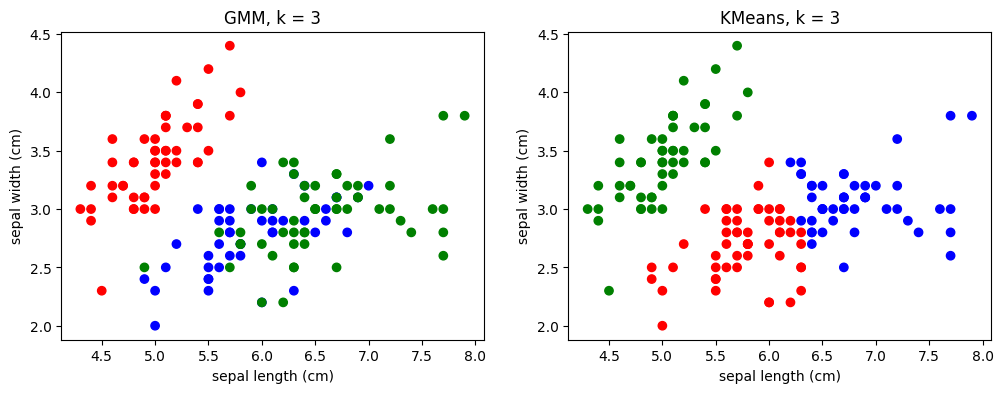

In [ ]:
colormap = {0: 'red', 1: 'green', 2:'blue'}

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# First subplot for GMM
ax1.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=[colormap.get(x) for x in gmm_labels])  
ax1.set_xlabel('sepal length (cm)')
ax1.set_ylabel('sepal width (cm)')
ax1.set_title(f"GMM, k = {len(set(gmm_labels))}")

# Second subplot for KMeans
ax2.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=[colormap.get(x) for x in kmean.labels_])  
ax2.set_xlabel('sepal length (cm)')
ax2.set_ylabel('sepal width (cm)')
ax2.set_title(f"KMeans, k = {len(set(kmean.labels_))}")

plt.show()

## Kernel Density Estimation (KDE)

Kernel Density Estimation (KDE) is a non-parametric technique used to estimate the probability density function of a random variable. In clustering, KDE is often used to visualize the density of points in a cluster. It can be used to supplement other clustering methods, such as K-means or GMM, by providing a more nuanced view of the data distribution and the density of the points within the clusters. KDE can also be used to estimate the number of clusters in a dataset, by identifying peaks in the density estimate and using them as potential cluster centers.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

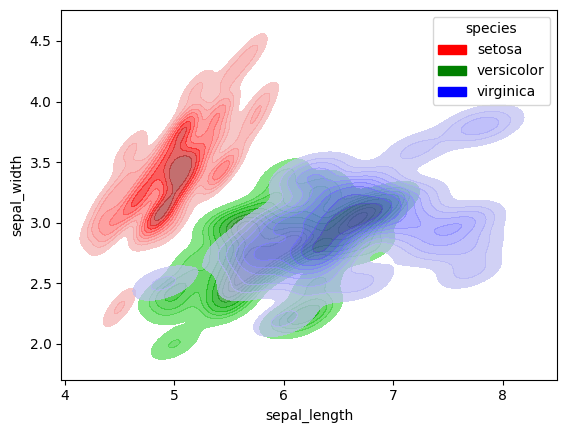

In [ ]:
import seaborn as sns

iris = sns.load_dataset("iris")

sns.kdeplot(
    data=iris, x="sepal_length", y="sepal_width",
    hue="species", fill=True, common_norm=False,
    alpha=.7, palette=["red", "green", "blue"],
    bw_adjust=0.6
)

**Exercise**

Change the value of the Kernel bandwidth `bw_adjust` to *2* and *0.6* and observe the changes. How do you interpret your results?


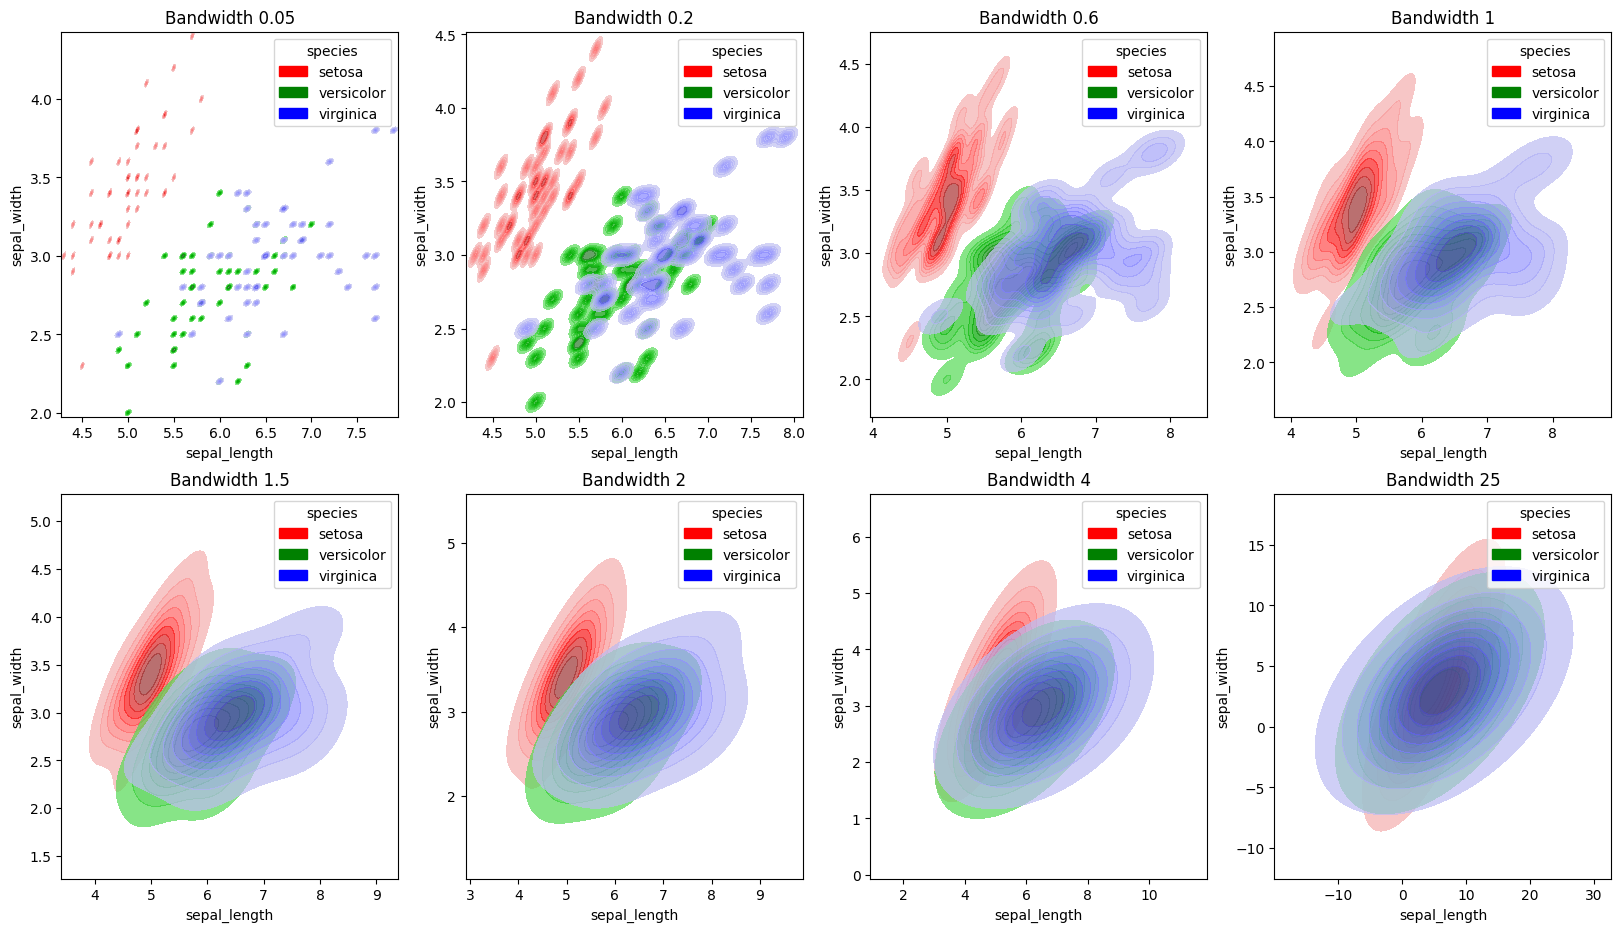

In [ ]:
bws = [0.05, 0.2, 0.6, 1, 1.5, 2, 4, 25]
_,ax = plt.subplots(2,4,figsize=(20,11))
for i,b in enumerate(bws):
  sns.kdeplot(
      data=iris, ax=ax[i//4,i%4], x="sepal_length", y="sepal_width",
      hue="species", fill=True, common_norm=False,
      alpha=.7, palette=["red", "green", "blue"],
      bw_adjust=b
  )
  ax[i//4,i%4].set_title(f'Bandwidth {b}')
plt.show()

**Answer**

Changing the value of the Kernel bandwidth `bw_adjust` to 2 will increase the smoothing effect of the KDE plot. This means that the plot will appear smoother and less sensitive to the individual data points. On the other hand, decreasing the bandwidth to 0.5 will result in a more jagged KDE plot that is more sensitive to the individual data points and less smooth.

In the context of clustering, the choice of bandwidth can affect the interpretation of the results:
- A smaller bandwidth may lead to overfitting, where noise in the data is given too much weight and the resulting clusters may not be meaningful. 
- A larger bandwidth may result in oversmoothing, where the structure in the data is lost and the resulting clusters may be too broad and not capture important features of the data. 

Therefore, it is important to carefully choose the bandwidth that best captures the structure of the data for a given clustering task.